In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as LA
from numpy import linalg as LA
import math

In [2]:
hands = pd.read_csv('all-hands.dat', header = None)
hands

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,296,509,305,481,329,465,350,443,365,417,...,136,369,141,407,152,442,153,477,142,511
1,284,511,299,488,321,471,335,449,348,426,...,127,369,131,406,140,442,141,477,126,510
2,293,510,310,490,328,472,340,450,352,427,...,126,375,130,410,137,444,145,476,133,507
3,310,506,323,483,345,466,359,443,372,419,...,143,375,148,411,158,445,165,479,156,511
4,334,509,351,490,369,472,381,449,392,427,...,160,377,165,412,174,444,185,476,181,509
5,316,511,330,489,351,471,365,450,378,427,...,143,380,149,415,160,448,171,481,162,511
6,284,508,295,481,311,457,332,437,349,412,...,119,370,126,405,140,439,143,473,133,508
7,351,507,365,484,383,465,394,441,403,417,...,174,383,179,417,188,449,203,480,197,511
8,301,509,314,489,333,473,350,455,366,436,...,136,370,141,406,150,441,154,477,140,510
9,317,502,330,481,351,467,367,446,381,426,...,141,365,146,398,154,430,168,460,161,490


## 1a

In [3]:
averages = hands.mean(axis=0).to_frame()
averages.head()

,0
0,298.888889
1,505.611111
2,313.944444
3,485.222222
4,333.333333


In [4]:
Xs = averages.iloc[::2].reset_index().drop('index', 1).rename(columns = {0:"X"})
Xs

C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_2856/1387243068.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Xs = averages.iloc[::2].reset_index().drop('index', 1).rename(columns = {0:"X"})


,X
0,298.888889
1,313.944444
2,333.333333
3,348.166667
4,361.500000
...,...
67,132.777778
68,135.777778
69,143.722222
70,151.722222


In [5]:
Ys = averages.iloc[1::2].reset_index().drop('index', 1).rename(columns = {0:"Y"})
Ys

C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_2856/2581891502.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Ys = averages.iloc[1::2].reset_index().drop('index', 1).rename(columns = {0:"Y"})


,Y
0,505.611111
1,485.222222
2,468.666667
3,447.888889
4,426.333333
...,...
67,366.000000
68,401.166667
69,434.777778
70,467.500000


In [6]:
frames = [Xs, Ys]
XandY = pd.concat(frames, axis = 1)
XandY.head(20)

,X,Y
0,298.888889,505.611111
1,313.944444,485.222222
2,333.333333,468.666667
3,348.166667,447.888889
4,361.500000,426.333333
5,376.444444,405.222222
6,392.555556,385.222222
7,399.000000,357.777778
8,410.055556,332.055556
9,423.166667,307.166667


<AxesSubplot:xlabel='X'>

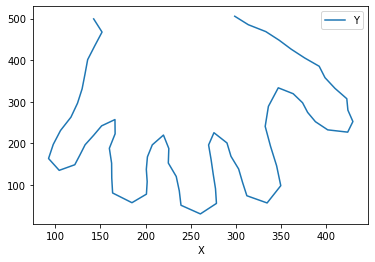

In [7]:
XandY.plot('X','Y')

## 1b

In [8]:
averages_rows = averages.transpose()
averages_rows

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,298.888889,505.611111,313.944444,485.222222,333.333333,468.666667,348.166667,447.888889,361.5,426.333333,...,132.777778,366.0,135.777778,401.166667,143.722222,434.777778,151.722222,467.5,142.444444,499.222222


In [9]:
hands.head()

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,296,509,305,481,329,465,350,443,365,417,...,136,369,141,407,152,442,153,477,142,511
1,284,511,299,488,321,471,335,449,348,426,...,127,369,131,406,140,442,141,477,126,510
2,293,510,310,490,328,472,340,450,352,427,...,126,375,130,410,137,444,145,476,133,507
3,310,506,323,483,345,466,359,443,372,419,...,143,375,148,411,158,445,165,479,156,511
4,334,509,351,490,369,472,381,449,392,427,...,160,377,165,412,174,444,185,476,181,509


In [10]:
X_tilda = pd.DataFrame(hands.values - averages_rows.values,columns = hands.columns)
X_tilda

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,-2.888889,3.388889,-8.944444,-4.222222,-4.333333,-3.666667,1.833333,-4.888889,3.5,-9.333333,...,3.222222,3.0,5.222222,5.833333,8.277778,7.222222,1.277778,9.5,-0.444444,11.777778
1,-14.888889,5.388889,-14.944444,2.777778,-12.333333,2.333333,-13.166667,1.111111,-13.5,-0.333333,...,-5.777778,3.0,-4.777778,4.833333,-3.722222,7.222222,-10.722222,9.5,-16.444444,10.777778
2,-5.888889,4.388889,-3.944444,4.777778,-5.333333,3.333333,-8.166667,2.111111,-9.5,0.666667,...,-6.777778,9.0,-5.777778,8.833333,-6.722222,9.222222,-6.722222,8.5,-9.444444,7.777778
3,11.111111,0.388889,9.055556,-2.222222,11.666667,-2.666667,10.833333,-4.888889,10.5,-7.333333,...,10.222222,9.0,12.222222,9.833333,14.277778,10.222222,13.277778,11.5,13.555556,11.777778
4,35.111111,3.388889,37.055556,4.777778,35.666667,3.333333,32.833333,1.111111,30.5,0.666667,...,27.222222,11.0,29.222222,10.833333,30.277778,9.222222,33.277778,8.5,38.555556,9.777778
5,17.111111,5.388889,16.055556,3.777778,17.666667,2.333333,16.833333,2.111111,16.5,0.666667,...,10.222222,14.0,13.222222,13.833333,16.277778,13.222222,19.277778,13.5,19.555556,11.777778
6,-14.888889,2.388889,-18.944444,-4.222222,-22.333333,-11.666667,-16.166667,-10.888889,-12.5,-14.333333,...,-13.777778,4.0,-9.777778,3.833333,-3.722222,4.222222,-8.722222,5.5,-9.444444,8.777778
7,52.111111,1.388889,51.055556,-1.222222,49.666667,-3.666667,45.833333,-6.888889,41.5,-9.333333,...,41.222222,17.0,43.222222,15.833333,44.277778,14.222222,51.277778,12.5,54.555556,11.777778
8,2.111111,3.388889,0.055556,3.777778,-0.333333,4.333333,1.833333,7.111111,4.5,9.666667,...,3.222222,4.0,5.222222,4.833333,6.277778,6.222222,2.277778,9.5,-2.444444,10.777778
9,18.111111,-3.611111,16.055556,-4.222222,17.666667,-1.666667,18.833333,-1.888889,19.5,-0.333333,...,8.222222,-1.0,10.222222,-3.166667,10.277778,-4.777778,16.277778,-7.5,18.555556,-9.222222


In [11]:
constant =1/(len(X_tilda)-1)
covar_matrix = (X_tilda.T).dot(X_tilda)
covar_matrix = covar_matrix * constant
covar_matrix

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,549.045752,-4.163399,533.111111,-30.150327,539.450980,-33.862745,522.254902,-55.601307,504.823529,-71.549020,...,455.620915,68.411765,484.091503,67.137255,502.967320,52.973856,549.908497,45.529412,600.875817,43.320261
1,-4.163399,31.075163,-5.434641,28.444444,-5.862745,22.274510,-6.284314,20.424837,-8.617647,15.490196,...,-8.385621,50.823529,-0.915033,49.715686,4.415033,50.555556,-0.937908,52.735294,-7.405229,53.209150
2,533.111111,-5.434641,524.526144,-22.692810,528.078431,-24.843137,505.362745,-45.888889,485.264706,-58.627451,...,439.928105,62.352941,463.751634,59.539216,477.630719,44.633987,528.218954,35.205882,579.849673,30.601307
3,-30.150327,28.444444,-22.692810,39.241830,-26.607843,37.431373,-32.627451,38.790850,-37.117647,40.803922,...,-33.771242,37.941176,-33.418301,34.254902,-36.405229,34.052288,-36.287582,33.352941,-40.986928,30.359477
4,539.450980,-5.862745,528.078431,-26.607843,535.764706,-26.588235,514.647059,-48.725490,495.235294,-62.823529,...,449.019608,61.235294,473.960784,59.823529,488.980392,45.725490,537.274510,37.529412,587.666667,33.274510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,52.973856,50.555556,44.633987,34.052288,45.725490,15.921569,40.274510,4.797386,31.470588,-11.862745,...,22.947712,144.117647,45.477124,144.980392,65.816993,145.124183,62.228758,150.647059,45.457516,153.169935
140,549.908497,-0.937908,528.218954,-36.287582,537.274510,-43.098039,525.107843,-66.444444,510.382353,-87.137255,...,461.522876,74.058824,494.699346,74.754902,519.683007,62.228758,559.506536,57.970588,606.718954,58.712418
141,45.529412,52.735294,35.205882,33.352941,37.529412,14.352941,34.205882,3.294118,26.852941,-14.705882,...,20.117647,146.764706,44.117647,149.147059,66.676471,150.647059,57.970588,158.617647,37.823529,162.705882
142,600.875817,-7.405229,579.849673,-40.986928,587.666667,-47.078431,573.745098,-70.888889,557.470588,-90.568627,...,503.633987,61.000000,535.633987,60.568627,558.424837,45.457516,606.718954,37.823529,666.967320,37.718954


In [12]:
total_variance = pd.DataFrame(data=np.diag(covar_matrix))
total_variance.sum()

0    48685.068627
dtype: float64

## 1c

In [13]:
X_subset = X_tilda[[0,2]]
X_subset['multiply'] = X_subset[0]* X_subset[2]
covariance = X_subset['multiply'].sum()
covariance = covariance * constant
covariance

C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_2856/2033158124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset['multiply'] = X_subset[0]* X_subset[2]


533.1111111111111

In [14]:
correlation = covariance/((covar_matrix[0][0] ** 0.5) * (covar_matrix[2][2]**0.5))
correlation


0.9934131321568846

The correlation between the 2 columns are significantly high due to their high covariance. Covariance and correlation are related in the sense that covariance can be obtained by multiplying the correlation with the standard deviation of two dimensions. Since the covariance is high, it would make sense for the correlation to be high as well.

## 1d

In [15]:
matrix = covar_matrix.to_numpy()
matrix

array([[549.04575163,  -4.16339869, 533.11111111, ...,  45.52941176,
        600.87581699,  43.32026144],
       [ -4.16339869,  31.0751634 ,  -5.43464052, ...,  52.73529412,
         -7.40522876,  53.20915033],
       [533.11111111,  -5.43464052, 524.52614379, ...,  35.20588235,
        579.8496732 ,  30.60130719],
       ...,
       [ 45.52941176,  52.73529412,  35.20588235, ..., 158.61764706,
         37.82352941, 162.70588235],
       [600.87581699,  -7.40522876, 579.8496732 , ...,  37.82352941,
        666.96732026,  37.71895425],
       [ 43.32026144,  53.20915033,  30.60130719, ..., 162.70588235,
         37.71895425, 169.00653595]])

In [16]:
eigenvalue, eigenvector = LA.eigh(matrix)
print(eigenvalue)
print(eigenvector)

[-1.38871044e-12 -1.04852762e-12 -9.26800305e-13 -7.85809287e-13
 -6.83456877e-13 -6.80910963e-13 -6.47863491e-13 -5.96553320e-13
 -5.64270967e-13 -5.53537850e-13 -5.12643951e-13 -5.09063323e-13
 -4.77240692e-13 -4.17154228e-13 -4.17030179e-13 -3.94512603e-13
 -3.79721295e-13 -3.78429817e-13 -3.53884216e-13 -3.49235057e-13
 -3.05769520e-13 -3.05476764e-13 -2.92526767e-13 -2.82154843e-13
 -2.76896170e-13 -2.63241992e-13 -2.50391288e-13 -2.39553673e-13
 -2.39378239e-13 -2.36050721e-13 -2.30903497e-13 -2.23803691e-13
 -2.07692337e-13 -1.93829451e-13 -1.86600167e-13 -1.85638182e-13
 -1.79120490e-13 -1.68789383e-13 -1.56258132e-13 -1.50888722e-13
 -1.48888169e-13 -1.45274554e-13 -1.35044890e-13 -1.25806702e-13
 -1.23013083e-13 -1.12690938e-13 -1.12001408e-13 -9.88971556e-14
 -9.70496591e-14 -9.64621038e-14 -9.24150505e-14 -8.59489585e-14
 -8.31882297e-14 -8.24531111e-14 -7.77646637e-14 -6.31581334e-14
 -6.03884062e-14 -5.79596770e-14 -4.73746855e-14 -3.71634459e-14
 -3.58561729e-14 -2.68614

In [17]:
#Flipping so that the greatest eigenvector is in the left corner
eigenvalue = np.flip(eigenvalue)
#eigenvector = np.flip(eigenvector)

In [18]:

print(eigenvalue)
print(eigenvector)

[ 2.50215112e+04  8.09351354e+03  5.77157111e+03  4.82042945e+03
  2.58819413e+03  1.38331857e+03  4.10802350e+02  2.16684389e+02
  1.33545028e+02  8.46911053e+01  4.86970106e+01  3.10821871e+01
  2.69462925e+01  1.93841199e+01  1.68098325e+01  1.34194947e+01
  4.46881460e+00  3.13591423e-12  2.50439725e-12  8.92121128e-13
  8.07168099e-13  7.22144073e-13  6.70882070e-13  6.61291340e-13
  5.95394617e-13  5.59023981e-13  5.12591241e-13  4.81515855e-13
  4.59254861e-13  4.55465400e-13  4.43676487e-13  3.92611977e-13
  3.63979695e-13  3.47457000e-13  3.46289419e-13  3.22796919e-13
  3.06523432e-13  2.95354916e-13  2.95193748e-13  2.80110643e-13
  2.52715314e-13  2.50058984e-13  2.45021044e-13  2.30442549e-13
  2.20493445e-13  2.13120203e-13  2.08549652e-13  1.93660746e-13
  1.76666976e-13  1.72853224e-13  1.72655423e-13  1.65309521e-13
  1.62016438e-13  1.47836630e-13  1.32897456e-13  1.23705295e-13
  1.19650556e-13  1.16785679e-13  1.16194092e-13  1.13634694e-13
  9.19491264e-14  8.83060

In [19]:
one = eigenvector.dot(eigenvalue) #eigh vector * eigh val
PCA = one.dot(eigenvector.T) #(eigh vector * eigh val * vector transpose)
PCA

array([-3009.91480382, -1895.33439585,  1221.98635802, -2224.48926727,
       -4536.8910977 , -2999.10236836,  3610.92931418,  2638.02596175,
       -2684.74945036, -4872.52530641,  1226.38920589,  2915.08105976,
        3359.11560203,   -45.14200306,  3846.8428266 ,  3045.26412792,
        1251.56856409,  3213.56503571, -1709.21752859,  -877.15993966,
       -1624.18663271,   252.13519489,   832.83961393,  1028.93872794,
        2462.91335482,  1860.86714978,  3497.57431516,  2899.37768083,
       -3001.21467234,    35.66703488,  -137.18083453,  2702.69899476,
       -2660.5658383 ,  1963.47362901,  1883.93310095,   991.38728052,
         678.09248106,  -359.06430237, -2373.36510595, -1399.20861634,
       -1173.85554641,  -885.54102226,  2208.0218554 ,  -217.81586123,
       -1974.962785  ,  -211.07963893,  -578.06927049, -1486.82453837,
        -362.18988937,  -232.80369957,  3973.21828885,  -435.10736086,
        1493.23723259,   650.27283245, -1936.99868587,   998.40913296,
      

## 1e

In [20]:
prin_comp = pd.DataFrame(eigenvalue, columns = ['Values'])
prin_comp['proportion'] = prin_comp['Values']/prin_comp['Values'].sum()
prin_comp.head(20)

,Values,proportion
0,2.502151e+04,5.139463e-01
1,8.093514e+03,1.662422e-01
2,5.771571e+03,1.185491e-01
3,4.820429e+03,9.901248e-02
4,2.588194e+03,5.316197e-02
5,1.383319e+03,2.841361e-02
6,4.108023e+02,8.437954e-03
7,2.166844e+02,4.450736e-03
8,1.335450e+02,2.743039e-03
9,8.469111e+01,1.739570e-03


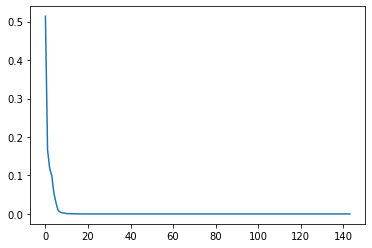

In [21]:
plt.plot(prin_comp['proportion'],)

## How many eigenvalues are nonzero? What does this tell you about the dimensionality of your data?

17 eigenvalues are nonzero; This means that there are 127 other dimensions that we are able to discard and focus on the 17 eigenvalues for our analysis.

## 1f

In [22]:
#First Principle Component
first_prin_comp = pd.DataFrame(eigenvalue, columns = ['Values']).head(1)
first_prin_comp['Values'] = np.sqrt(first_prin_comp['Values'])
#first_prin_comp.dropna(inplace = True)
print(first_prin_comp)

# second
second_prin_comp = pd.DataFrame(eigenvalue, columns = ['Values'])
second_prin_comp= np.sqrt((second_prin_comp['Values'][1]))

#third
third_prin_comp = pd.DataFrame(eigenvalue, columns = ['Values'])
third_prin_comp = np.sqrt((third_prin_comp['Values'][2]))


       Values
0  158.181893


In [23]:
first_prin_comp['neg_three'] = first_prin_comp['Values'] * -3
first_prin_comp['neg_one'] = first_prin_comp['Values'] * -1.5
first_prin_comp['zero'] = first_prin_comp['Values'] * 0
first_prin_comp['one'] = first_prin_comp['Values'] * 1.5
first_prin_comp['three'] = first_prin_comp['Values'] * 3

second_prin_comp_neg_three = second_prin_comp * -3
second_prin_comp_neg_one = second_prin_comp * -1.5
second_prin_comp_zero = second_prin_comp * 0
second_prin_comp_one = second_prin_comp* 1.5
second_prin_comp_three = second_prin_comp * 3

third_prin_comp_neg_three = third_prin_comp * -3
third_prin_comp_neg_one = third_prin_comp * -1.5
third_prin_comp_zero = third_prin_comp * 0
third_prin_comp_one = third_prin_comp* 1.5
third_prin_comp_three = third_prin_comp * 3

In [24]:
first_prin_comp.drop(columns = ['Values'], inplace = True)


In [25]:
first_eigen = eigenvector[:,143]
print(first_eigen)

second_eigen = eigenvector[:,142]

third_eigen = eigenvector[:,141]


[-1.30919967e-01  3.81100414e-03 -1.27875381e-01  9.80464157e-03
 -1.31654041e-01  8.40619248e-03 -1.28307009e-01  1.36623495e-02
 -1.25086116e-01  1.73123074e-02 -1.23773508e-01  2.00854262e-02
 -1.21156995e-01  2.32737817e-02 -1.09856275e-01  2.54705240e-02
 -9.88380582e-02  3.00611978e-02 -8.91253308e-02  3.31621990e-02
 -8.39174984e-02  3.15210465e-02 -7.82003175e-02  3.37954012e-02
 -7.86146862e-02  3.39328413e-02 -8.15497603e-02  3.19517815e-02
 -8.50449860e-02  3.08523519e-02 -8.89659163e-02  3.04499298e-02
 -9.62811661e-02  2.91527311e-02 -1.07093589e-01  2.69928250e-02
 -1.20112464e-01  1.56087774e-02 -1.18472517e-01  1.57520465e-02
 -1.04978539e-01  1.33160602e-02 -8.59994436e-02  1.86288125e-02
 -6.74511181e-02  2.46711975e-02 -4.76509694e-02  3.03015471e-02
 -2.67303486e-02  2.04356835e-02 -3.67874665e-02  1.25053771e-02
 -5.19323180e-02  9.99030624e-03 -6.78857184e-02  9.55875093e-03
 -7.75730182e-02  8.84086832e-03 -9.31168152e-02  7.18081788e-03
 -1.11631734e-01  8.60798

In [26]:
second_prin_comp = np.array([second_prin_comp_neg_three, second_prin_comp_neg_one, second_prin_comp_zero, second_prin_comp_one,second_prin_comp_three])
second_prin_comp = pd.DataFrame(second_prin_comp)
print(second_prin_comp)

third_prin_comp = np.array([third_prin_comp_neg_three, third_prin_comp_neg_one, third_prin_comp_zero, third_prin_comp_one,third_prin_comp_three])
third_prin_comp = pd.DataFrame(third_prin_comp)
print(second_prin_comp)

first_one = pd.DataFrame(first_eigen)
first_prin_comp_test = first_prin_comp.T
first_one_TEST = first_one.T

second_one = pd.DataFrame(second_eigen)
print(second_one)
# second_prin_comp_test = second_prin_comp.T
second_one_TEST = second_one.T

third_one = pd.DataFrame(third_eigen)
print(third_one)
# second_prin_comp_test = second_prin_comp.T
third_one_TEST = third_one.T

asd = first_prin_comp_test.dot(first_one_TEST)
asd = asd.T

asd2 = second_prin_comp.dot(second_one_TEST)
asd2 = asd2.T
asd2.rename(columns={0: "neg_three", 1: "neg_one",2:"zero",3:"one",4:"three"}, inplace = True)

asd3 = third_prin_comp.dot(third_one_TEST)
asd3 = asd3.T
asd3.rename(columns={0: "neg_three", 1: "neg_one",2:"zero",3:"one",4:"three"}, inplace = True)




            0
0 -269.891871
1 -134.945935
2    0.000000
3  134.945935
4  269.891871
            0
0 -269.891871
1 -134.945935
2    0.000000
3  134.945935
4  269.891871
            0
0    0.015223
1   -0.025179
2   -0.003011
3   -0.038490
4    0.001150
..        ...
139 -0.058534
140  0.024243
141 -0.057022
142  0.031426
143 -0.053187

[144 rows x 1 columns]
            0
0    0.113040
1    0.024624
2    0.117054
3    0.039053
4    0.107464
..        ...
139  0.053881
140  0.094545
141  0.042791
142  0.107298
143  0.032773

[144 rows x 1 columns]


In [27]:
asd['neg_three'] = asd['neg_three'].add(averages[0])
asd['neg_one'] = asd['neg_one'].add(averages[0])
asd['zero'] = asd['zero'].add(averages[0])
asd['one'] = asd['one'].add(averages[0])
asd['three'] = asd['three'].add(averages[0])

asd2['neg_three'] = asd2['neg_three'].add(averages[0])
asd2['neg_one'] = asd2['neg_one'].add(averages[0])
asd2['zero'] = asd2['zero'].add(averages[0])
asd2['one'] = asd2['one'].add(averages[0])
asd2['three'] = asd2['three'].add(averages[0])

asd3['neg_three'] = asd3['neg_three'].add(averages[0])
asd3['neg_one'] = asd3['neg_one'].add(averages[0])
asd3['zero'] = asd3['zero'].add(averages[0])
asd3['one'] = asd3['one'].add(averages[0])
asd3['three'] = asd3['three'].add(averages[0])


X1 = asd.iloc[::2].reset_index().drop('index', 1).rename(columns = {'neg_three':"X1",'neg_one':'X2',
                                                                           'zero':'X3','one':'X4','three':'X5'})
Y1 = asd.iloc[1::2].reset_index().drop('index', 1).rename(columns = {'neg_three':"Y1",'neg_one':'Y2',
                                                                   'zero':'Y3','one':'Y4','three':'Y5'})

X2 = asd2.iloc[::2].reset_index().drop('index', 1).rename(columns = {'neg_three':"X1",'neg_one':'X2',
                                                                           'zero':'X3','one':'X4','three':'X5'})
Y2 = asd2.iloc[1::2].reset_index().drop('index', 1).rename(columns = {'neg_three':"Y1",'neg_one':'Y2',
                                                                   'zero':'Y3','one':'Y4','three':'Y5'})

X3 = asd3.iloc[::2].reset_index().drop('index', 1).rename(columns = {'neg_three':"X1",'neg_one':'X2',
                                                                           'zero':'X3','one':'X4','three':'X5'})
Y3 = asd3.iloc[1::2].reset_index().drop('index', 1).rename(columns = {'neg_three':"Y1",'neg_one':'Y2',
                                                                   'zero':'Y3','one':'Y4','three':'Y5'})


frames = [X1, Y1]
XsandYs = pd.concat(frames, axis = 1)
print(XsandYs)

frames2 = [X2, Y2]
XsandYs2 = pd.concat(frames2, axis = 1)

frames3 = [X3, Y3]
XsandYs3 = pd.concat(frames3, axis = 1)


            X1          X2          X3          X4          X5          Y1  \
0   361.016394  329.952641  298.888889  267.825137  236.761384  503.802616   
1   374.627154  344.285799  313.944444  283.603090  253.261735  480.569472   
2   395.809190  364.571261  333.333333  302.095405  270.857477  464.677544   
3   409.054203  378.610435  348.166667  317.722898  287.279130  441.405480   
4   420.859076  391.179538  361.500000  331.820462  302.140924  418.117853   
..         ...         ...         ...         ...         ...         ...   
67  189.081057  160.929418  132.777778  104.626138   76.474498  365.830989   
68  194.406152  165.091965  135.777778  106.463591   77.149404  401.909832   
69  203.848041  173.785131  143.722222  113.659313   83.596404  434.671372   
70  214.700716  183.211469  151.722222  120.232976   88.743729  467.594774   
71  211.350947  176.897696  142.444444  107.991193   73.537942  499.786088   

            Y2          Y3          Y4          Y5  
0   504.70

C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_2856/3754753326.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X1 = asd.iloc[::2].reset_index().drop('index', 1).rename(columns = {'neg_three':"X1",'neg_one':'X2',
C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_2856/3754753326.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Y1 = asd.iloc[1::2].reset_index().drop('index', 1).rename(columns = {'neg_three':"Y1",'neg_one':'Y2',
C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_2856/3754753326.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X2 = asd2.iloc[::2].reset_index().drop('index', 1).rename(columns = {'neg_three':"X1",'neg_one':'X2',
C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_2856/3754753326.py:27: FutureWarning: I

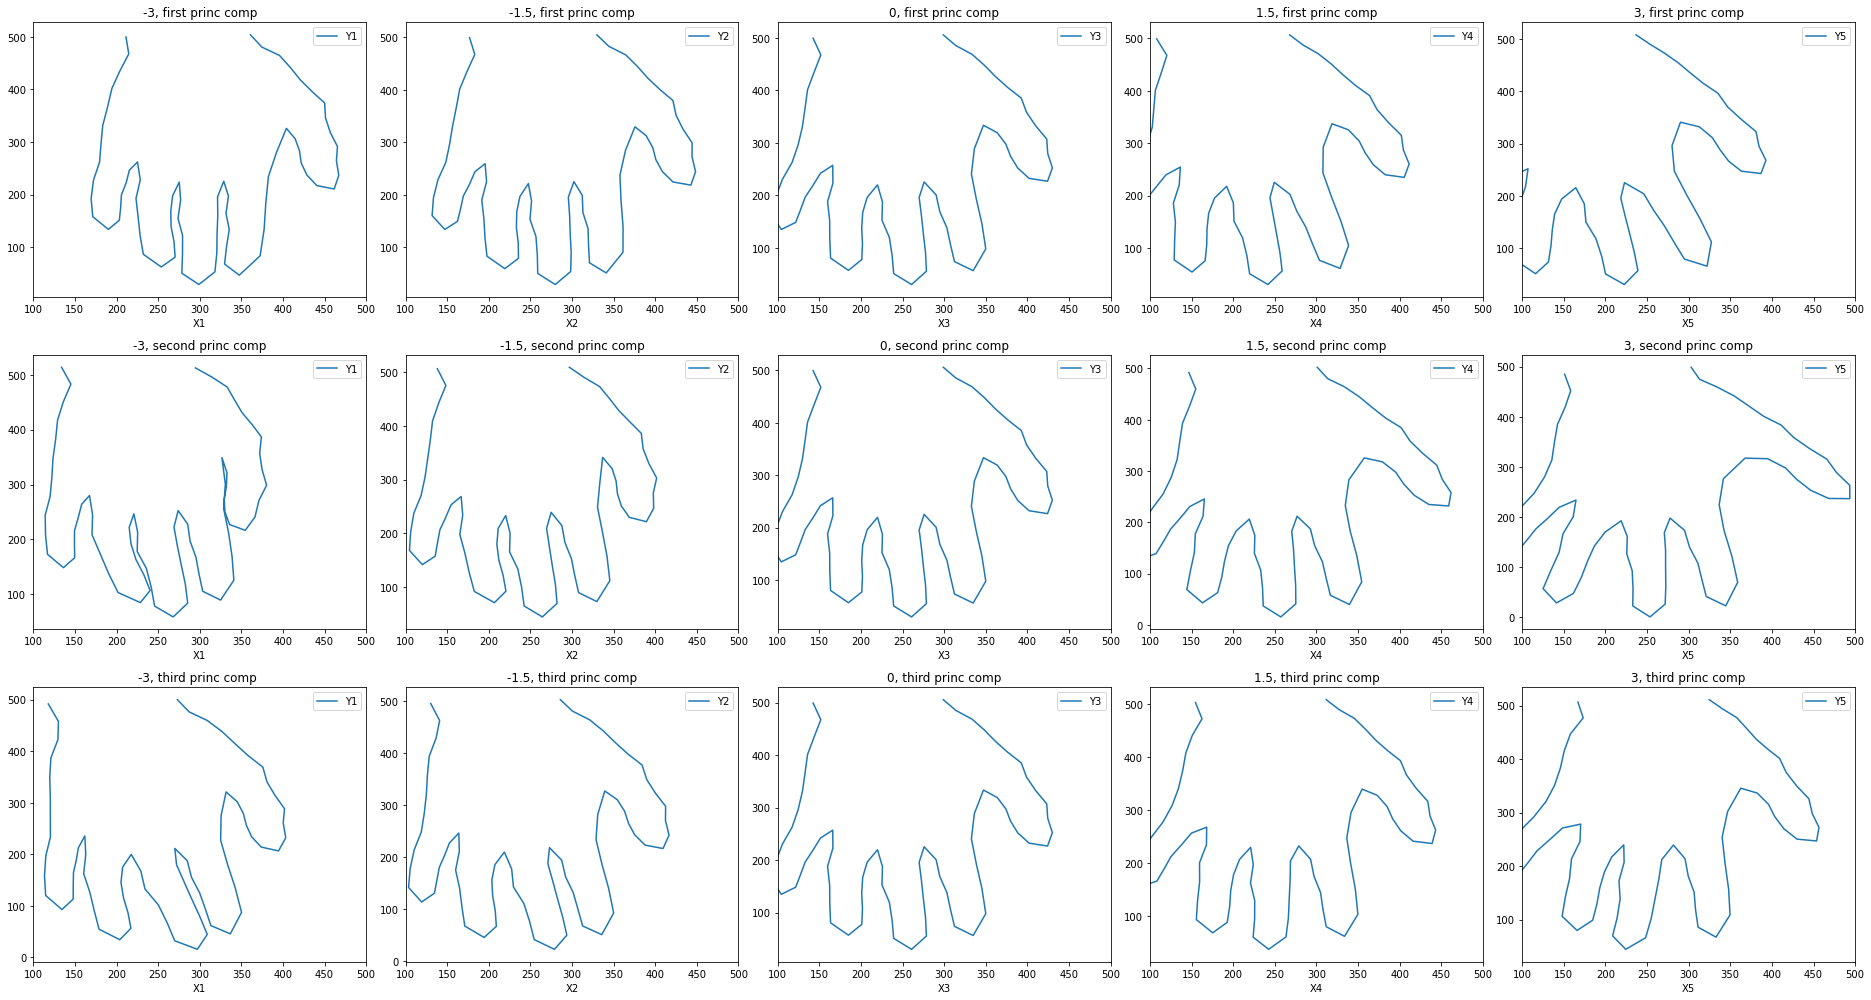

In [41]:
fig, axes = plt.subplots(3,5, figsize=(26,14))


XsandYs.plot(x= 'X1',y= 'Y1',ax = axes[0,0], title='-3, first princ comp')
XsandYs.plot('X2','Y2', ax = axes[0,1], title='-1.5, first princ comp')
XsandYs.plot('X3','Y3', ax = axes[0,2], title='0, first princ comp')
XsandYs.plot('X4','Y4', ax = axes[0,3], title='1.5, first princ comp')
XsandYs.plot('X5','Y5', ax = axes[0,4], title='3, first princ comp')


XsandYs2.plot('X1','Y1',ax = axes[1,0], title='-3, second princ comp' )
XsandYs2.plot('X2','Y2', ax = axes[1,1], title='-1.5, second princ comp')
XsandYs2.plot('X3','Y3', ax = axes[1,2], title='0, second princ comp')
XsandYs2.plot('X4','Y4', ax = axes[1,3], title='1.5, second princ comp')
XsandYs2.plot('X5','Y5', ax = axes[1,4], title='3, second princ comp')

XsandYs3.plot('X1','Y1',ax = axes[2,0], title='-3, third princ comp ')
XsandYs3.plot('X2','Y2', ax = axes[2,1], title='-1.5, third princ comp')
XsandYs3.plot('X3','Y3', ax = axes[2,2], title='0, third princ comp')
XsandYs3.plot('X4','Y4', ax = axes[2,3], title='1.5, third princ comp')
XsandYs3.plot('X5','Y5', ax = axes[2,4], title='3, third princ comp')
plt.tight_layout()
plt.setp(axes, xlim=(100,500))
plt.show()




As the dimension increases, the hand progressively spreads out.

## 1g

In [29]:
total = 0
count = 0
for index, row in prin_comp.iterrows():
    total += row['proportion']
    count += 1
    if(total >= 0.95):
        print(count)
        break
    

5


## 1h

In [30]:
eigenvector.T

array([[ 0.00000000e+00, -3.50759228e-01, -4.18740409e-01, ...,
        -1.23729244e-02,  1.93966409e-01,  1.14570397e-01],
       [ 0.00000000e+00,  2.57634772e-01, -3.25447868e-01, ...,
        -3.47858343e-02,  3.30951398e-02,  5.12236618e-02],
       [ 0.00000000e+00, -4.41317506e-02,  2.91810678e-02, ...,
        -2.71721450e-03,  8.00573419e-02,  7.35724404e-02],
       ...,
       [ 1.13039657e-01,  2.46238541e-02,  1.17053620e-01, ...,
         4.27911655e-02,  1.07297789e-01,  3.27733057e-02],
       [ 1.52227417e-02, -2.51789274e-02, -3.01057581e-03, ...,
        -5.70217564e-02,  3.14259705e-02, -5.31874110e-02],
       [-1.30919967e-01,  3.81100414e-03, -1.27875381e-01, ...,
        -1.99715697e-04, -1.45205206e-01, -1.18822245e-03]])

In [31]:
kth = eigenvector.T
lst = np.array([kth[139], kth[140],kth[141],kth[142], kth[143]])

lst = lst.T

tilda = X_tilda.to_numpy()[0]
print(tilda.shape)
scalar = tilda.dot(lst)

scalar = pd.DataFrame(scalar)
print(scalar)
kth = pd.DataFrame(lst)

(144,)
            0
0  -31.653208
1  -85.527382
2 -115.913969
3   53.718561
4  -51.370108


Vector of Weights: [-31.653208, -85.527382, -115.913969, 53.718561, -51.370108]

In [32]:
kth[0] = kth[0] * scalar[0][0]
kth[1] = kth[1] * scalar[0][1]
kth[2] = kth[2] * scalar[0][2]
kth[3] = kth[3] * scalar[0][3]
kth[4] = kth[4] * scalar[0][4]
kth


,0,1,2,3,4
0,-2.397921,6.340472,-13.102875,0.817744,6.725373
1,1.825115,2.455207,-2.854249,-1.352576,-0.195772
2,-2.609593,4.334651,-13.568150,-0.161724,6.568972
3,1.844533,-1.169625,-4.526747,-2.067637,-0.503665
4,-2.334731,4.701586,-12.456581,0.061766,6.763082
...,...,...,...,...,...
139,1.635538,9.874204,-6.245510,-3.144363,-0.011519
140,-2.068234,8.608927,-10.959122,1.302295,6.817493
141,2.194847,10.428773,-4.960094,-3.063127,0.010259
142,-2.962054,7.326648,-12.437313,1.688158,7.459207


In [33]:
kth['sum'] = kth[0] + kth[1] + kth[2] + kth[3] + kth[4]
kth

,0,1,2,3,4,sum
0,-2.397921,6.340472,-13.102875,0.817744,6.725373,-1.617208
1,1.825115,2.455207,-2.854249,-1.352576,-0.195772,-0.122274
2,-2.609593,4.334651,-13.568150,-0.161724,6.568972,-5.435843
3,1.844533,-1.169625,-4.526747,-2.067637,-0.503665,-6.423142
4,-2.334731,4.701586,-12.456581,0.061766,6.763082,-3.264879
...,...,...,...,...,...,...
139,1.635538,9.874204,-6.245510,-3.144363,-0.011519,2.108351
140,-2.068234,8.608927,-10.959122,1.302295,6.817493,3.701360
141,2.194847,10.428773,-4.960094,-3.063127,0.010259,4.610659
142,-2.962054,7.326648,-12.437313,1.688158,7.459207,1.074646


In [34]:
summation = kth['sum'].to_frame()
summation

,sum
0,-1.617208
1,-0.122274
2,-5.435843
3,-6.423142
4,-3.264879
...,...
139,2.108351
140,3.701360
141,4.610659
142,1.074646


C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_2856/2663941322.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_1h = summation.iloc[::2].reset_index().drop('index', 1).rename(columns = {'sum':"X"})
C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_2856/2663941322.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Y_1h = summation.iloc[1::2].reset_index().drop('index', 1).rename(columns = {'sum':"Y"})
C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_2856/2663941322.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_X = df.iloc[::2].reset_index().drop('index', 1).rename(columns = {0:"X_firstrow"})
C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_2856/2663941322.py:17: FutureWarning: In a future version of pandas all arguments o

<AxesSubplot:xlabel='X_firstrow'>

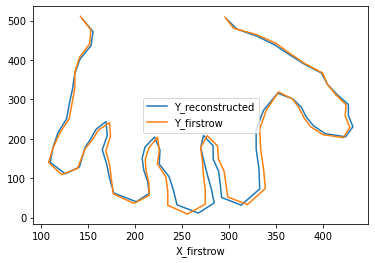

In [35]:
X_1h = summation.iloc[::2].reset_index().drop('index', 1).rename(columns = {'sum':"X"})
Y_1h = summation.iloc[1::2].reset_index().drop('index', 1).rename(columns = {'sum':"Y"})

X_1h['X'] = X_1h['X'].add(Xs['X'])

Y_1h['Y'] = Y_1h['Y'].add(Ys['Y'])

frames_1h = [X_1h, Y_1h]
XY_1h = pd.concat(frames_1h, axis = 1)
XY_1h.rename(columns = {'X':'X_reconstructed', 'Y':'Y_reconstructed'},inplace = True)


df = pd.DataFrame(hands.head(1))
df = df.T

df_X = df.iloc[::2].reset_index().drop('index', 1).rename(columns = {0:"X_firstrow"})
df_Y = df.iloc[1::2].reset_index().drop('index', 1).rename(columns = {0:"Y_firstrow"})

frames_df = [df_X, df_Y]
XY_df = pd.concat(frames_df, axis = 1)

fig, ax = plt.subplots()

XY_1h.plot('X_reconstructed','Y_reconstructed', ax = ax)
XY_df.plot('X_firstrow','Y_firstrow', ax = ax)


Yes, they are similar to each other shown by the similar hand shapes.